### 비트코인 가격 예측

https://www.blockchain.com/explorer/charts/market-price

- auto_arima를 사용하여 적합한 모델을 찾고, 이를 통해 금융 데이터 포트폴리오를 제작한다.

In [1]:
import pandas as pd
import json

with open('./datasets/bitcoin_2010_2024.json') as f:
    json_data = json.load(f)


bitcoin_df = pd.DataFrame(json_data['market-price'])
bitcoin_df

,x,y
0,1230940800000,0.00
1,1231286400000,0.00
2,1231632000000,0.00
3,1231977600000,0.00
4,1232323200000,0.00
...,...,...
1405,1716508800000,67942.23
1406,1716854400000,69374.17
1407,1717200000000,67484.93
1408,1717545600000,70553.24


In [2]:
from datetime import datetime

def changeDate(milis):
    # 타임스탬프를 초 단위로 변환
    timestamp = milis / 1000
    
    # 타임스탬프를 datetime 객체로 변환
    convorted_time = datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d')

    return convorted_time

In [3]:
bitcoin_df.loc[:,'x'] = bitcoin_df.x.apply(changeDate)
bitcoin_df

,x,y
0,2009-01-03,0.00
1,2009-01-07,0.00
2,2009-01-11,0.00
3,2009-01-15,0.00
4,2009-01-19,0.00
...,...,...
1405,2024-05-24,67942.23
1406,2024-05-28,69374.17
1407,2024-06-01,67484.93
1408,2024-06-05,70553.24


In [4]:
bitcoin_df.set_index('x',inplace=True)
bitcoin_df

,y
x,
2009-01-03,0.00
2009-01-07,0.00
2009-01-11,0.00
2009-01-15,0.00
2009-01-19,0.00
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [5]:
bitcoin_df.index = pd.to_datetime(bitcoin_df.index)
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1410 entries, 2009-01-03 to 2024-06-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1410 non-null   float64
dtypes: float64(1)
memory usage: 22.0 KB


In [6]:
bitcoin_n_df = bitcoin_df['2017-01-01':]

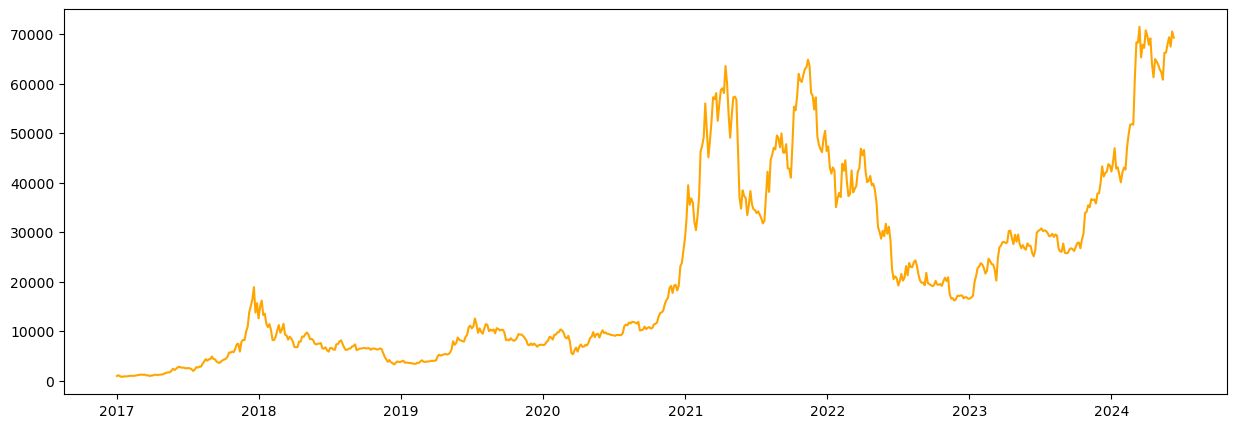

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.plot(bitcoin_n_df, c='orange')
plt.show()

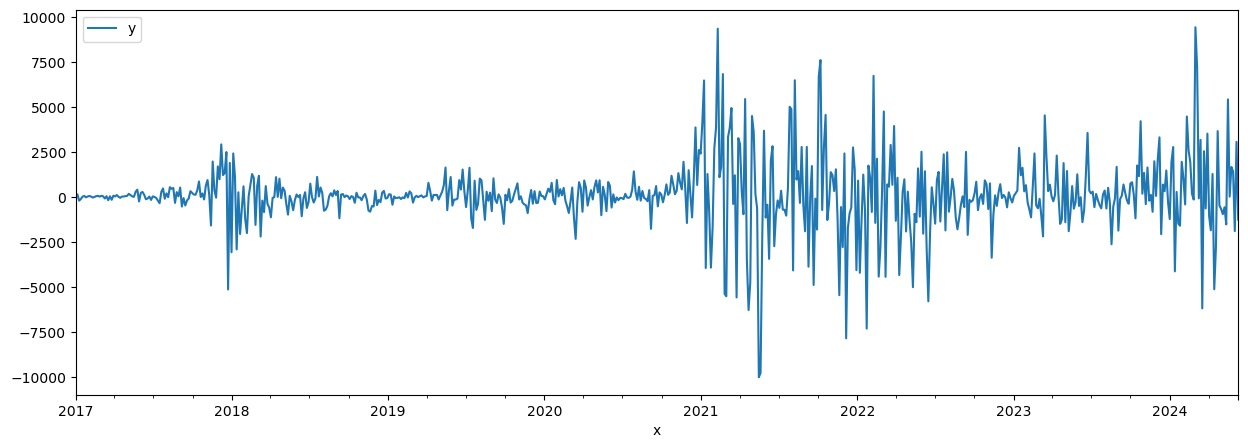

In [8]:
bitcoin_n_df.diff().plot(figsize=(15, 5), subplots=True)
plt.show()

<Axes: >

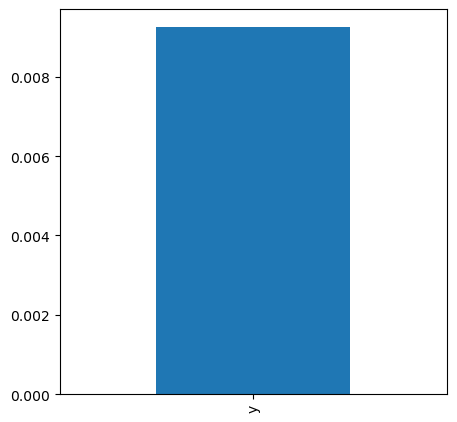

In [9]:
bitcoin_n_df.pct_change().mean().plot(kind='bar', figsize=(5, 5))

<Axes: xlabel='x'>

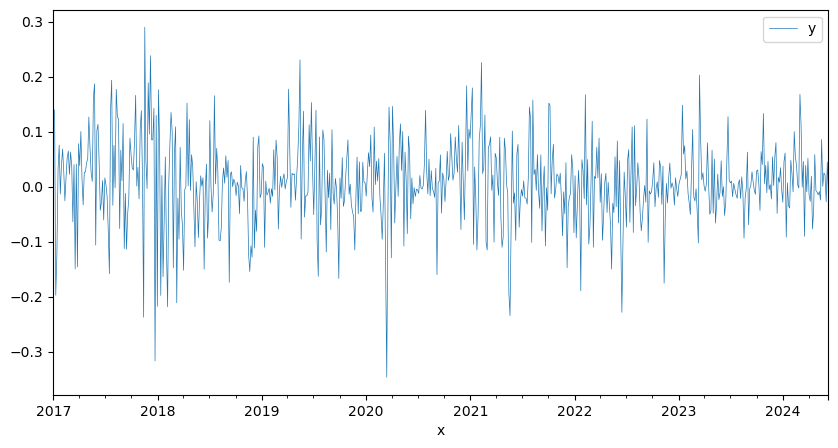

In [10]:
import numpy as np

rate_b_df = np.log(bitcoin_n_df / bitcoin_n_df.shift(1))
rate_b_df.plot(figsize=(10, 5), lw=0.5)

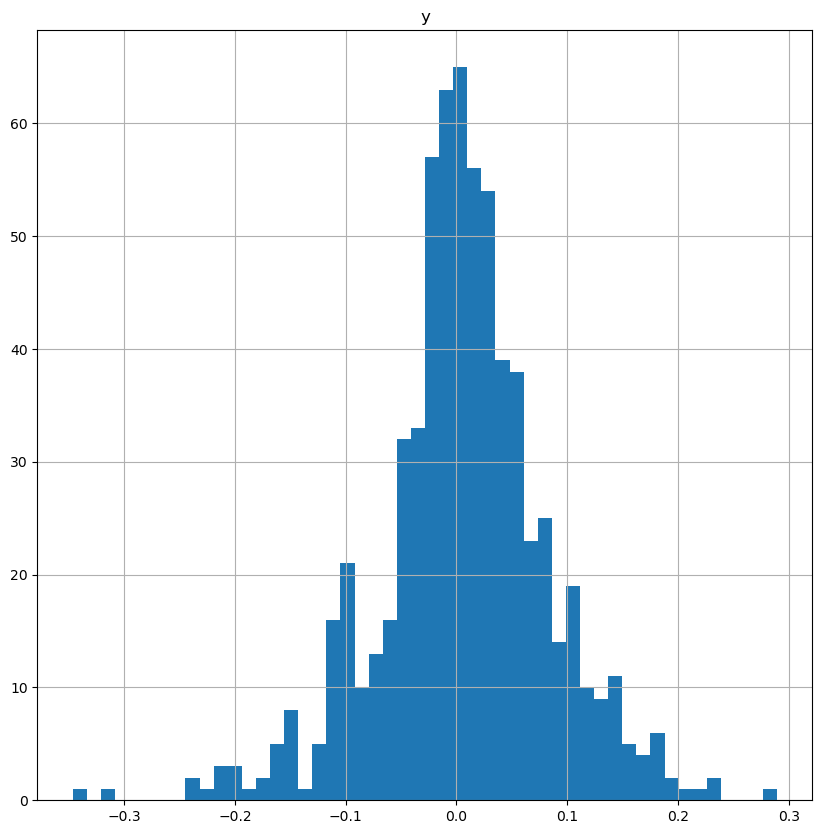

In [11]:
rate_b_df.hist(figsize=(10, 10), bins=50)
plt.show()

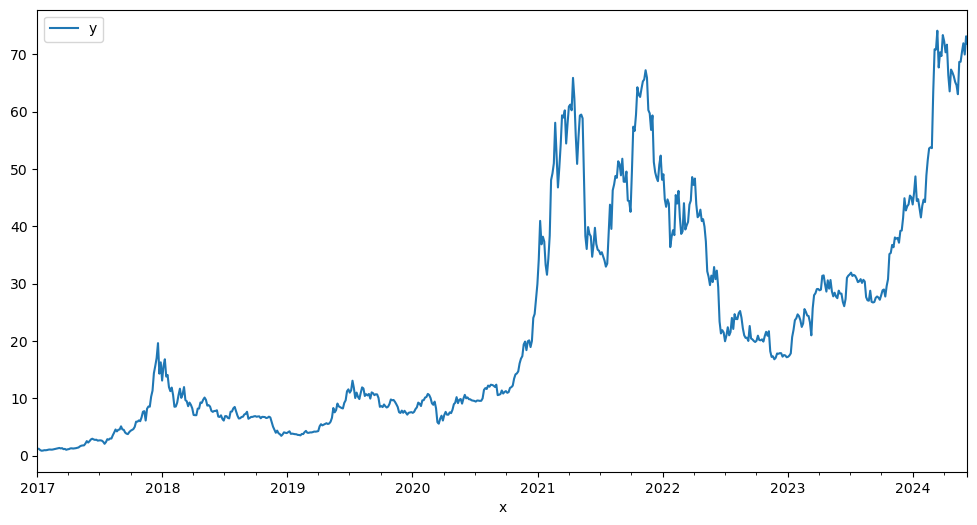

In [12]:
# 일간 수익률
rate_b_df.cumsum().apply(np.exp).plot(figsize=(12, 6))
plt.show()

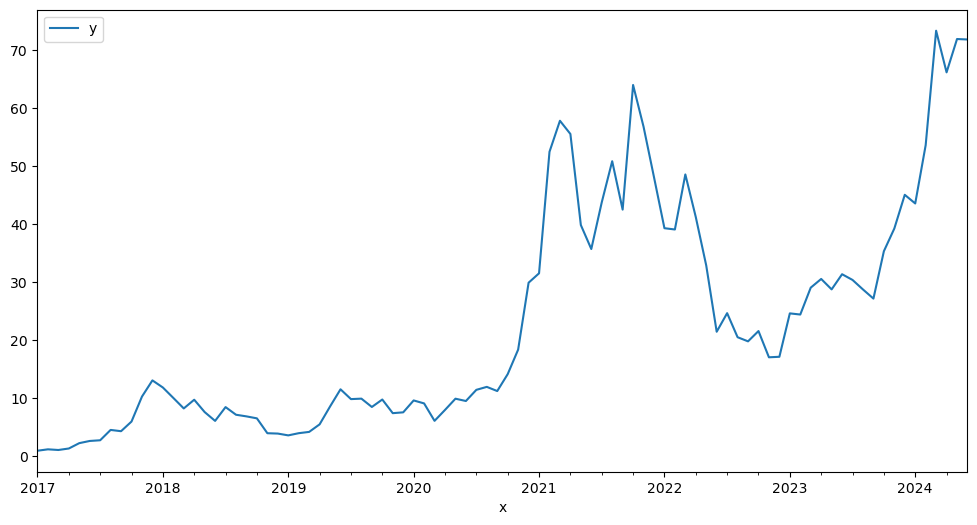

In [13]:
# 월간 수익률
rate_b_df.cumsum().apply(np.exp).resample('1m').last().plot(figsize=(12, 6))
plt.show()

In [14]:
b_df = bitcoin_n_df.dropna()
b_df

,y
x,
2017-01-01,964.84
2017-01-05,1109.16
2017-01-09,910.49
2017-01-13,805.52
2017-01-17,830.56
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [15]:
window = 20

b_df['min'] = b_df['y'].rolling(window=window).min()
b_df['mean'] = b_df['y'].rolling(window=window).mean()
b_df['std'] = b_df['y'].rolling(window=window).std()
b_df['median'] = b_df['y'].rolling(window=window).median()
b_df['max'] = b_df['y'].rolling(window=window).max()

b_df.dropna()

,y,min,mean,std,median,max
x,,,,,,
2017-03-18,1068.30,805.52,1031.3255,138.516565,1006.140,1271.04
2017-03-22,1113.00,805.52,1038.7335,138.735410,1032.815,1271.04
2017-03-26,961.81,805.52,1031.3660,138.711078,1006.140,1271.04
2017-03-30,1039.77,805.52,1037.8300,135.762652,1025.425,1271.04
2017-04-03,1079.99,830.56,1051.5535,124.444300,1047.160,1271.04
...,...,...,...,...,...,...
2024-05-24,67942.23,60805.78,66133.4685,3065.494173,66252.600,71489.22
2024-05-28,69374.17,60805.78,66186.8320,3114.222252,66252.600,71489.22
2024-06-01,67484.93,60805.78,65986.6175,2874.911875,66252.600,70754.69


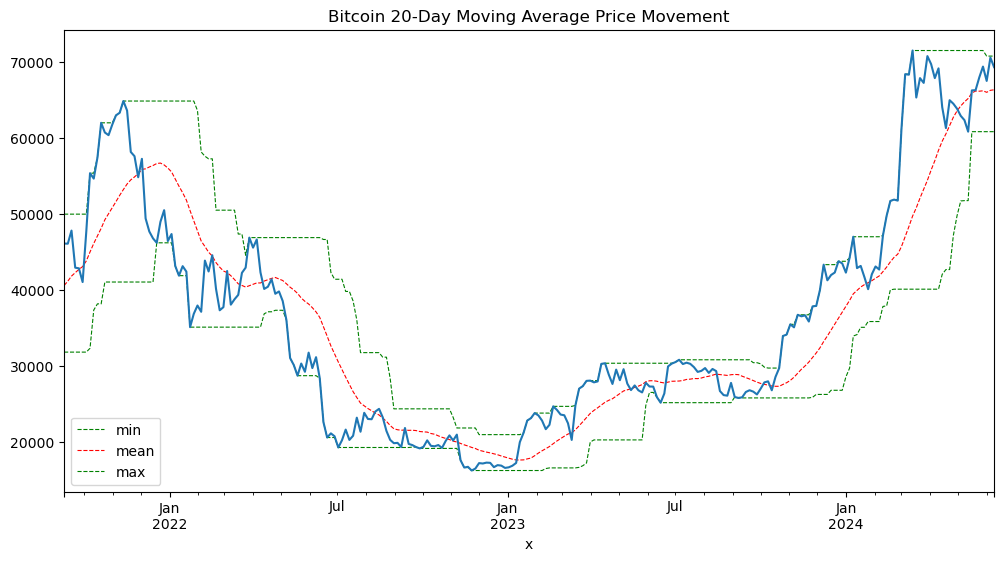

In [16]:
import matplotlib.pyplot as plt

ax = b_df[['min', 'mean', 'max']].iloc[-252:].plot(figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=0.8)
b_df['y'].iloc[-252:].plot(ax=ax)
plt.title("Bitcoin 20-Day Moving Average Price Movement")
plt.show()

In [17]:
# SMA(Simple Moving Average): 일정 기간동안의 가격의 평균을 나타내는 보조지표
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정

b_df['SMA1'] = b_df['y'].rolling(window=21).mean() #short-term
b_df['SMA2'] = b_df['y'].rolling(window=252).mean() #long-term
b_df[['y', 'SMA1', 'SMA2']].tail()

,y,SMA1,SMA2
x,,,
2024-05-24,67942.23,66240.335238,35938.461587
2024-05-28,69374.17,66287.787619,36017.234087
2024-06-01,67484.93,66248.646190,36090.361349
2024-06-05,70553.24,66204.075714,36183.208056
2024-06-09,69297.93,66394.278571,36259.995952


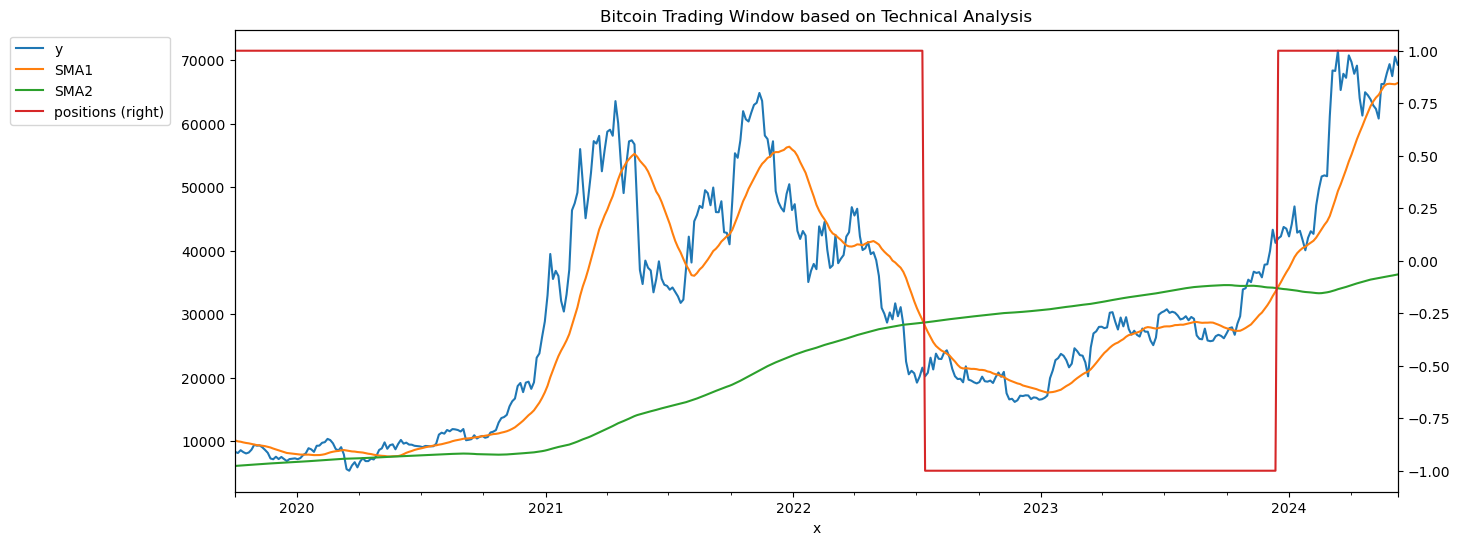

In [18]:
# 아마존 주가 기술 분석
# 골든 크로스, 데드 크로스
b_df.dropna(inplace=True)

b_df['positions'] = np.where(b_df['SMA1'] > b_df['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = b_df[['y', 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("Bitcoin Trading Window based on Technical Analysis")
plt.show()

## Auto ARIMA

In [19]:
bitcoin_df = bitcoin_n_df.dropna()

In [20]:
bitcoin_df

,y
x,
2017-01-01,964.84
2017-01-05,1109.16
2017-01-09,910.49
2017-01-13,805.52
2017-01-17,830.56
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [21]:
y_train = bitcoin_df['y'][:int(0.8 * len(bitcoin_df))]
y_test = bitcoin_df['y'][int(0.8 * len(bitcoin_df)):]

<Axes: xlabel='x'>

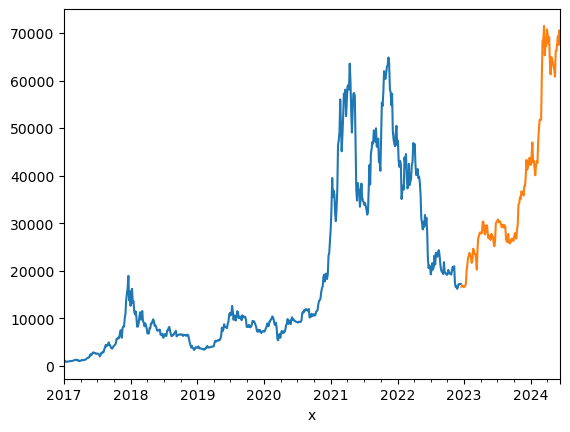

In [22]:
y_train.plot()
y_test.plot()

In [23]:
from pmdarima.arima import ndiffs

kpss_diffs= ndiffs(y_train, alpha=0.05, test = 'kpss', max_d =6)
adf_diffs= ndiffs(y_train, alpha=0.05, test = 'adf', max_d =6)
pp_diffs= ndiffs(y_train, alpha=0.05, test = 'pp', max_d =6)

n_diffs = max(kpss_diffs,adf_diffs, pp_diffs)

print(f'd={n_diffs}')

d=1


In [24]:
import pmdarima as pm


model = pm.auto_arima(y=y_train, 
                      d=1,
                      start_p = 0, 
                      max_p = 5, 
                      start_q=0, 
                      max_q=5, 
                      m=1, 
                      seasonal =False, 
                      stepwise=True, 
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9728.517, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9726.582, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9726.546, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9726.657, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9728.545, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9728.592, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9730.550, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=9724.663, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=9726.662, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=9726.709, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=9724.698, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=9728.605, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.385 seconds


In [25]:
model.fit(y_train)

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [26]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  544
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -4860.331
Date:                Wed, 12 Jun 2024   AIC                           9724.663
Time:                        11:23:04   BIC                           9733.257
Sample:                    01-01-2017   HQIC                          9728.023
                         - 12-13-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0862      0.022      3.865      0.000       0.042       0.130
sigma2       3.51e+06   1.07e+05     32.672      0.000     3.3e+06    3.72e+06
Ljung-Box (L1) (Q):                   0.00   Jarque-

## 해석
- Prob(Q)의 수치가 0.99이므로 독립적이고 동일한 분포를 따르고 있다.
- 모델이 데이터의 패턴을 잘 포착하고 있으며, 예측 오차가 무작위로 발생하고 있음을 나타냄
- Prob(H)의 수치가 0.00이므로 잔차의 분산이 일정하지 않다
- 잔차의 이분산성이 존재하면 잔차의 분산이 일정하지 않으며 시간에 따라 변한다.
- Prob(JB)의 수치가 0.00이므로 평균과 분산이 일정하지 않고 잔차가 정규성을 따르지 않는다.
- Skew의 수치가 -0.33이므로 잔차 분포가 약간 왼쪽으로 치우쳐 있음을 의미한다.
- Kurtosis의 수치가 9.44이므로 잔차 분포가 정규분포보다 더 뾰족함을 나타낸다.

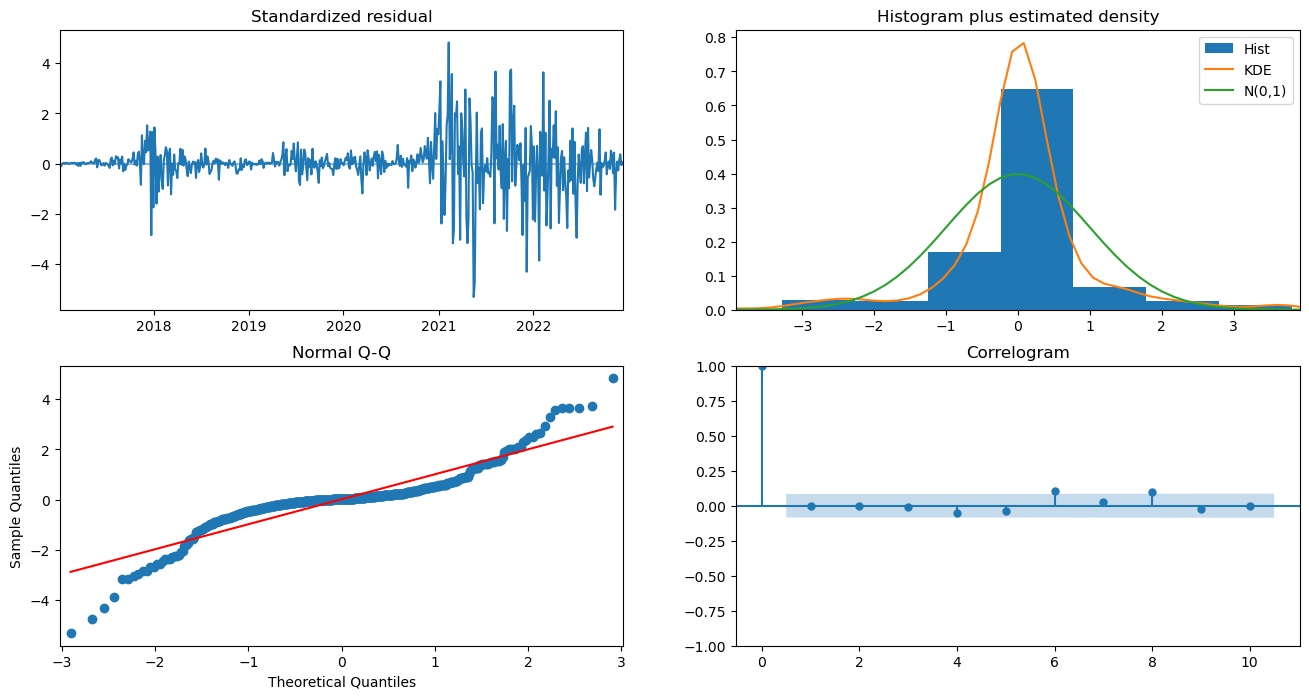

In [27]:
import matplotlib.pyplot as plt

model.plot_diagnostics(figsize=(16,8))
plt.show()

In [28]:
prediction = model.predict(n_periods=len(y_test))
prediction

2022-12-17    17203.541131
2022-12-21    17203.541131
2022-12-25    17203.541131
2022-12-29    17203.541131
2023-01-02    17203.541131
                  ...     
2024-05-24    17203.541131
2024-05-28    17203.541131
2024-06-01    17203.541131
2024-06-05    17203.541131
2024-06-09    17203.541131
Freq: 4D, Length: 136, dtype: float64

In [29]:
prediction, conf_int = model.predict(n_periods=1, return_conf_int=True)
print(conf_int)
print(prediction)

[[13531.3330262  20875.74923639]]
2022-12-17    17203.541131
Freq: 4D, dtype: float64


In [30]:
prediction.tolist()[0]

17203.541131292302

In [31]:
def predict_one_step():
    prediction = model.predict(n_periods=1)
    return prediction.tolist()[0]

In [32]:
p_list = []

for data in y_test:
    p = predict_one_step()
    p_list.append(p)

    model.update(data)

In [33]:
y_predict_df = pd.DataFrame({"test": y_test, "pred": p_list})
y_predict_df

,test,pred
x,,
2022-12-17,16637.60,17203.541131
2022-12-21,16904.64,16588.820530
2022-12-25,16838.10,16931.825475
2022-12-29,16539.28,16830.033169
2023-01-02,16613.71,16514.245985
...,...,...
2024-05-24,67942.23,66234.722993
2024-05-28,69374.17,68073.747877
2024-06-01,67484.93,69475.407048


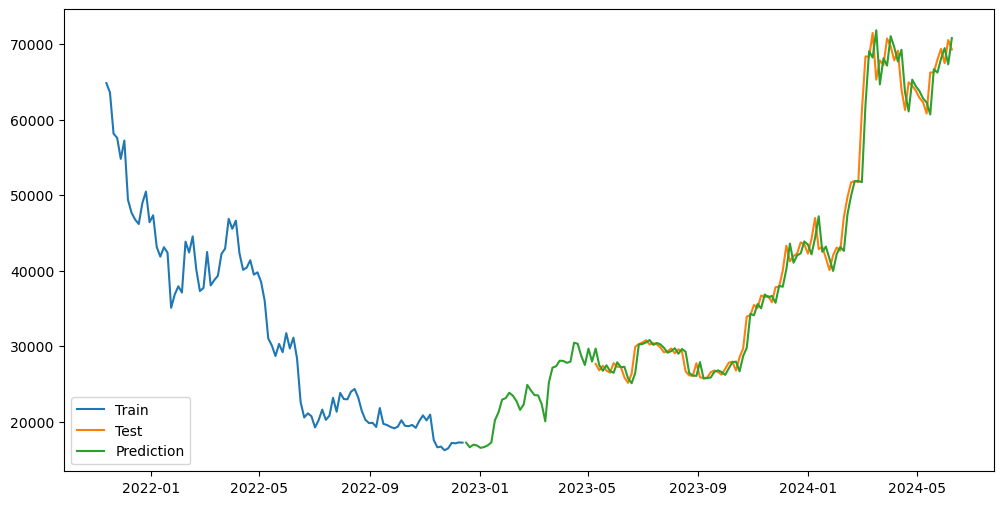

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(y_train.iloc[-100:], label='Train')
plt.plot(y_test.iloc[-100:], label='Test')
plt.plot(y_predict_df.pred, label='Prediction')
plt.legend()
plt.show()

In [37]:
import numpy as np

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAPE (%): {MAPE(y_test, p_list):.4f}')

MAPE (%): 3.5465
